# Classification

- Example: Credit Card Default

![image.png](./img/16.png)

## Why not Linear regression

![image.png](./img/17.png)

- In this case of a **binary outcome**, linear regression does a good job as a classifier, and is equivalent to `linear discriminant analysis`.
  - For more than 2 outcome classes, regression will suggests an ordering ($3>2>1$), therefore can not use regression for multi-types classification.
- However, `linear regression` might produce probabilities less than zero or bigger than one. `Logistic regression` is more appropriate.

![image.png](./img/18.png)


## Logistic Regression

- **Definition**: `Logistic Regression` is a statistical method used for `binary classification`. It predicts the probability that a given instance belongs to a particular class. The core idea is to model the probability that a target variable `Y` is a particular value ($1$ or $0$) given a set of independent variables `X`.

  $$
  p(X)=\frac{e^{\beta_0+\beta_1 x}}{1+e^{\beta_0+\beta_1 x}}
  $$

- A bit of rearrangement gives \* This monotone transformation is called the `log odds` or `logit` transformation of $p(X)$
  $$
  log(\frac{p(X)}{1-p(X)}=\beta_0+\beta_1 X)
  $$

### The logistic Function

- The `logistic function`, also known as the `sigmoid` function, is an S-shaped curve that can take any real-valued number and map it into a value between $0$ and $1$, but **never exactly at those limits**. Mathematically, it is represented as:
  $$
  \sigma(Z)=\frac{1}{1+e^{-z}}
  $$
- where $z$ is a linear combination of the input features $X$, i.e., $z = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ$, where $β₀, β₁, ..., βₙ$ are the parameters of the model.


### Estimate Parameters (Maximum Likelihood)

$$
l(\beta_0,\beta)=\prod_{i:y_i=1}p(x_i)\prod_{i:y_i=0}(1-p(x_i))
$$

- The parameters $β₀, β₁, ..., βₙ$ are estimated using the `Maximum Likelihood Estimation` (MLE).
- The idea is to find the set of parameters that maximize the likelihood of the observed data.
- We pick $\beta_0$ and $\beta$ to maximize the likelihood of observed data.

![image.png](./img/19.png)

### Making Predictions

![image.png](./img/20.png)


### Script Example


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./Data/Heart.csv",index_col=0)
data.head()

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
1   63    1       typical     145   233    1        2    150      0      2.3   
2   67    1  asymptomatic     160   286    0        2    108      1      1.5   
3   67    1  asymptomatic     120   229    0        2    129      1      2.6   
4   37    1    nonanginal     130   250    0        0    187      0      3.5   
5   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  
1      3  0.0       fixed   No  
2      2  3.0      normal  Yes  
3      2  2.0  reversable  Yes  
4      3  0.0      normal   No  
5      1  0.0      normal   No

<Axes: title={'center': 'Age'}, xlabel='AHD'>

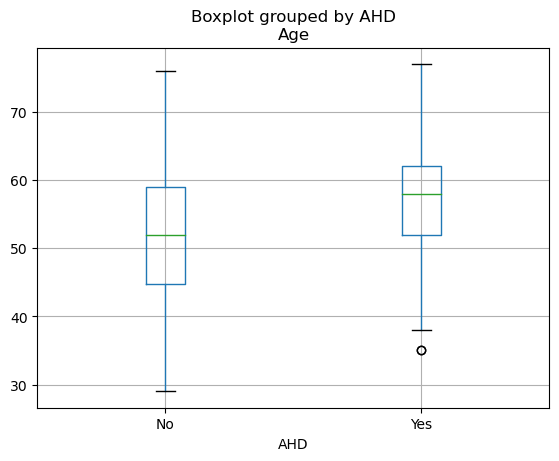

In [3]:
data.boxplot(by="AHD",column=["Age"])

In [4]:
X,y = data[["Chol","Age"]],data["AHD"]
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creating a logistic regression model
model = LogisticRegression()

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.4918032786885246


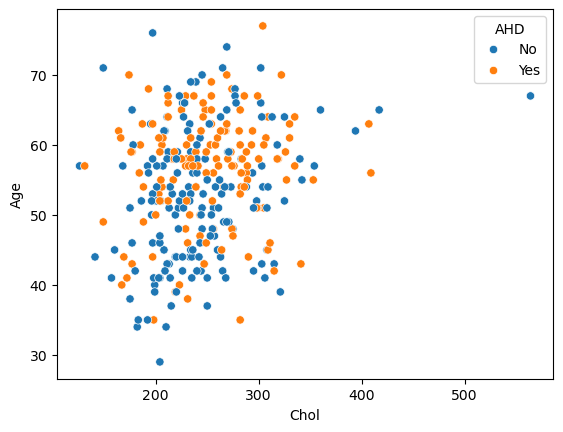

In [5]:
# Create the scatter plot
sns.scatterplot(x="Chol", y="Age", hue="AHD", data=data)
plt.show()

## Multi-variate Logistic Regression

![image.png](./img/21.png)

![image.png](./img/22.png)

- Equation $4.10$ also called `Soft-MAX` function

### Case-control sampling and logistic regression

- For example, in heart disease analysis, we have $160$ cases, 302 controls $\to \tilde \pi = 0.35$ are cases. Yet the prevalence of heart disease in this region is $\pi = 0.05$ (`Prior Knowledge`)
  _ In this situation, `logistic regression` can estimate regression parameter $\beta_j$ accurately (if the model is correct), but the intercept $\beta_0$ is incorrect
  _ We can correct the intercept by following transformation
  $$
  \hat \beta_0^* = \hat \beta_0 + log \frac{\pi}{1-\pi}-log\frac{\tilde \pi}{1-\tilde \pi}
  $$

### Diminishing returns in unbalanced binary data

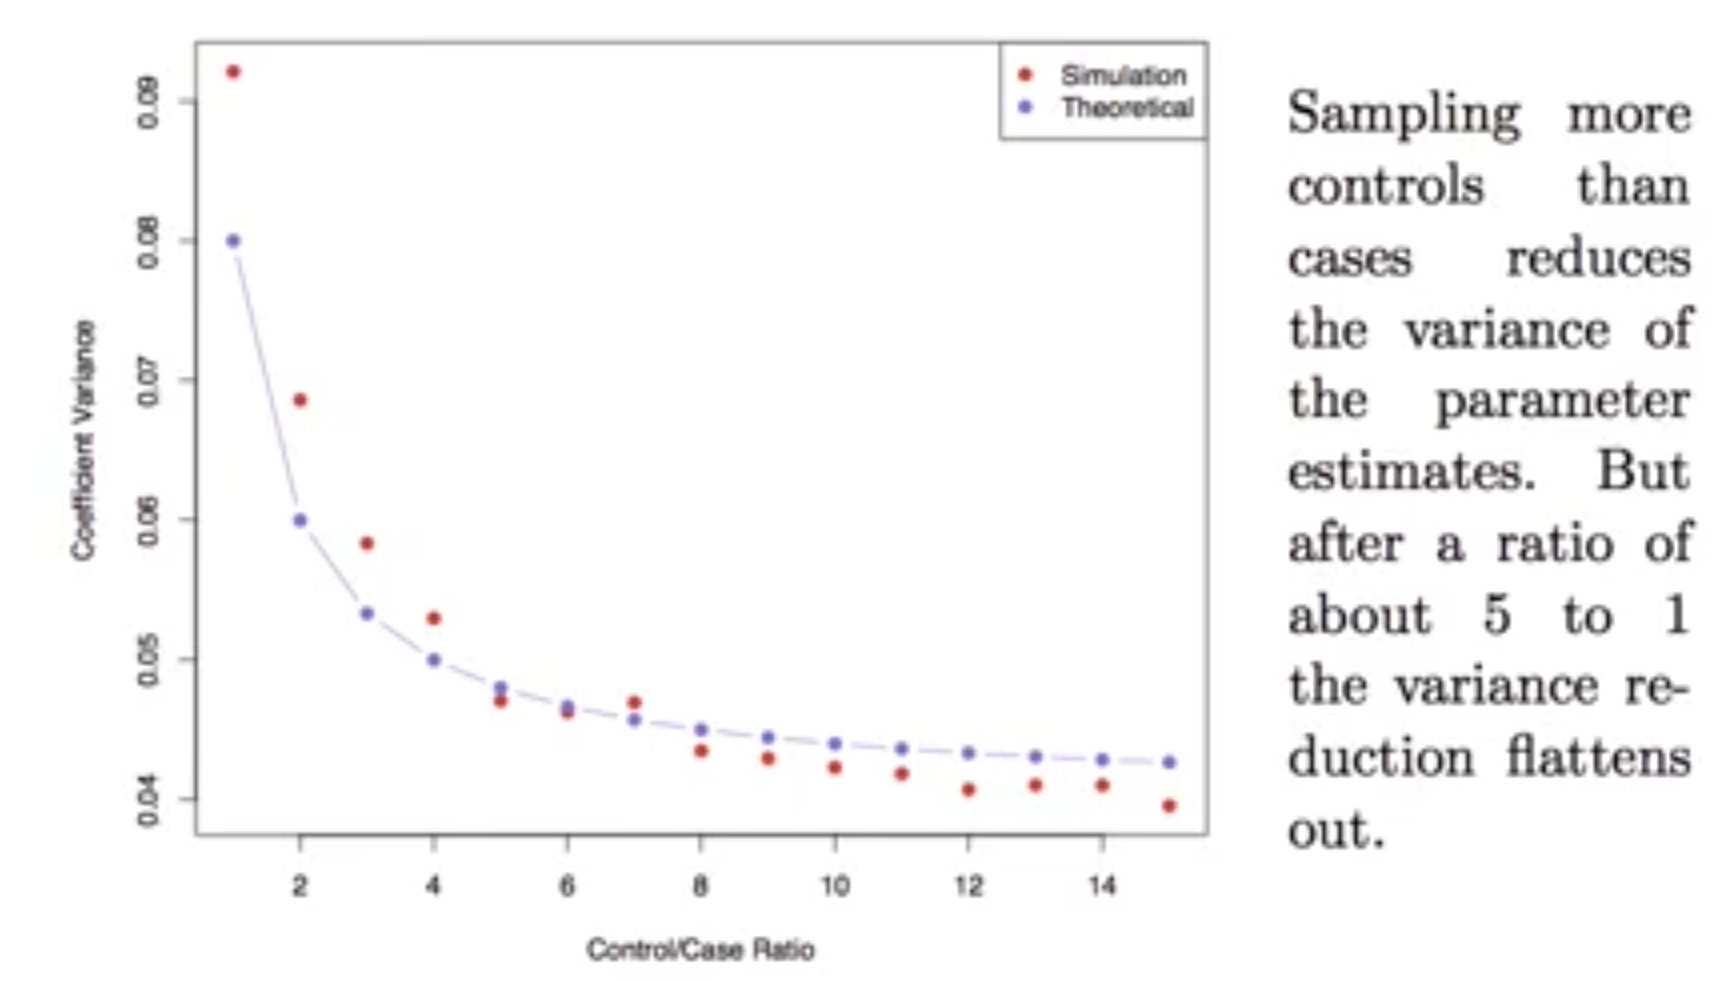

- **Introduction**: In the context of machine learning, particularly with `binary classification` tasks, the concept of `diminishing returns` often becomes significant in scenarios with `unbalanced datasets`.

  - An unbalanced dataset is one in which the number of instances of one class (the majority class) significantly outnumbers the instances of the other class (the minority class).
  - Adding more data points of the `majority class` to the training set **results in progressively smaller improvements, or even a decline**, in the model's ability to predict the `minority class` accurately.

- **Reasons for Diminishing Return**s

1. Model Bias Towards Majority Class
2. Inefficient Learning

- **Mitigation Strategies**

1. Resampling Techniques
   - Balancing the dataset through `oversampling` the `minority` class or `undersampling` the `majority` class.
2. Cost-Sensitive Learning
   - Adjusting the algorithm to **penalize misclassifications** from the `minority` class more heavily.


In [6]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

In [7]:
# Generate an unbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.98, 0.02], 
                           n_informative=3, n_redundant=1, flip_y=0, n_features=20, 
                           n_clusters_per_class=1, n_samples=100000, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     29402
           1       0.90      0.69      0.78       598

    accuracy                           0.99     30000
   macro avg       0.95      0.85      0.89     30000
weighted avg       0.99      0.99      0.99     30000



## Discriminant Analysis

- Discriminant Analysis model the distribution of $X$ in each of the classes separately, and then use `Bayes theorem` to flip things around and obtain $Pr(Y|X)$
  - If we assume normal (Gaussian) distributions for each features $X$, it lead to linear or quadratic discriminant analysis (`LDA` and `QDA`)
  - When the predictor variables $X$ are assumed to have the **same** `covariance matrix` across different classes but **different** `means`, the resulting discriminant function is **linear** with respect to the predictor variables.
  - **Quadratic Discriminant Analysis** (`QDA`): QDA does not assume the covariance to be identical across classes. Hence, it uses the **class-specific** `covariance matrix`.
    - offering more flexibility than LDA at the cost of increased computational complexity.

### Why Discriminant Analysis

- When the classes are well-separated, the logistic regression's parameter are surprisingly unstable.
  - When classes are **perfectly or nearly perfectly separated** by a linear decision boundary, the `logistic regression` algorithm will **push the coefficients towards infinity** in an attempt to achieve perfect separation.
  - If $n$ (sample size) is small and distribution of the predictors $X$ is approximately normal,linear discriminant model is more stable
  - Linear discriminant analysis is popular when we have than 2 response classes.

### Bayes theorem for classification

$$
Pr(Y=k|X=x) = \frac{Pr(X=x|Y=k)*Pr(Y=k)}{Pr(X=x)}
$$

- We write slightly different discriminant analysis since we are dealing with continuous variables
  _ $f_k(x) = Pr(X=x|Y=k)$ is the `density` for $X$ in class $k$.
  _ `LDA` and `QDA` assumes it's a normal distribution \* $\pi_k=Pr(Y=k)$ is the marginal or `prior` probability for class $k$
  $$
  Pr(Y=k|X=x) = \frac{\pi_k f_k(x))}{\sum_{l=1}^{K}\pi_l f_l(x)}
  $$

![image.png](./img/23.png)


### Linear Discriminant Analysis with one predictor ($p=1$)

- The Gaussian density has the form
  _ $\mu_k$ is the mean, and $\sigma_k^2$ is the variance for class $k$
  _ We assume $\sigma_k=\sigma$ for every class

  $$
  f_k(x)=\frac{1}{\sqrt{2\pi}\sigma_k}e^{-0.5(\frac{x-\mu_k}{\sigma_k})^2}
  $$

- Plugging into Bayes formula, we get the expression for $p_k(x)=Pr(Y=k|X=x)$
  $$
  p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2\pi}\sigma_k}e^{-0.5(\frac{x-\mu_k}{\sigma_k})^2}}{\sum_{l=1}^{K}\pi_l \frac{1}{\sqrt{2\pi}\sigma_k}e^{-0.5(\frac{x-\mu_l}{\sigma_l})^2}}
  $$

1. Take the logarithm of both sides:
   $$
   log(p_k(x)) = log(\pi_k \frac{1}{\sqrt{2\pi}\sigma_k}e^{-0.5(\frac{x-\mu_k}{\sigma_k})^2}) - log(\sum_{l=1}^{K}\pi_l \frac{1}{\sqrt{2\pi}\sigma_k}e^{-0.5(\frac{x-\mu_l}{\sigma_l})^2})
   $$
2. Using the properties of logarithms, this can be simplified to
   $$
   log(p_k(x)) = log(\pi_k) - log(\sqrt{2\pi}\sigma_k) - 0.5(\frac{x-\mu_k}{\sigma_k})^2 - log(\sum_{l=1}^{K}\pi_l \frac{1}{\sqrt{2\pi}\sigma_k}e^{-0.5(\frac{x-\mu_l}{\sigma_l})^2})
   $$
3. Simplifying further:
   $$
   log(p_k(x)) = log(\pi_k) - \frac{1}{2}log(2\pi)-log(\sigma_k) - \frac{1}{2\sigma_k^2}(x-\mu_k)^2- log(\sum_{l=1}^{K}\pi_l \frac{1}{\sqrt{2\pi}\sigma_k}e^{-0.5(\frac{x-\mu_l}{\sigma_l})^2})
   $$
4. Assuming that the variances $\sigma_k^2$ are equal across all classes, and recognizing that the denominator is a constant with respect to class $k$, we can denote as $C$. also, $\frac{1}{2}log(2\pi)$ is also a constant respect to $k$
   $$
   log(p_k(x)) =  log(\pi_k) - log(\sigma) - \frac{1}{2\sigma_k^2}(x-\mu_k)^2 +C
   $$
5. Put $log(\sigma)$ into $C$, and expand $\frac{1}{2\sigma_k^2}(x-\mu_k)^2 \to \frac{1}{2\sigma_k^2} (x^2-2x\mu_k+\\mu_k^2)$, where $x^2$ is a constant to $k$
   $$
   log(p_k(x)) =  x*\frac{\mu_k}{\sigma^2}- \frac{\mu_k^2}{2 \sigma^2} + log(\pi_k) + C
   $$
6. throw $C$ and maximization $\delta_k(x) = log(p_k(x))  - C$
   $$
   \delta_k(x) = x*\frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} + log(\pi_k)
   $$


### Example for decision boundary for equal prior probability

- We assume we have 2 response, and the prior probability is equal, now we try to find the decision boundary

1. Set $\delta_1(x) = \delta_2(x)$
   $$
    x*\frac{\mu_1}{\sigma^2} - \frac{\mu_1^2}{2 \sigma^2} + log(\pi_1) =  x*\frac{\mu_2}{\sigma^2} - \frac{\mu_2^2}{2 \sigma^2} + log(\pi_2)
   $$
2. Since we assume $\pi_1 = \pi_2$ , we can cancel them out
   $$
    x*\frac{\mu_1}{\sigma^2} - \frac{\mu_1^2}{2 \sigma^2} =  x*\frac{\mu_2}{\sigma^2} - \frac{\mu_2^2}{2 \sigma^2}
   $$
3. Re-format
   $$
   x = \frac{\mu_1^2-\mu_2^2}{2 \sigma^2} * \frac{\sigma^2}{\mu_1-\mu_2} \to x=\frac{\mu_1+\mu_2}{2}
   $$
   This is the midpoint between the means of the two classes. Since the prior probabilities are equal and the variances are assumed to be equal in LDA, the decision boundary is simply the average of the means of the two classes.


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
X, y = data[["Chol", "Age"]], data["AHD"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a linear discriminant analysis model
lda_model = LinearDiscriminantAnalysis()

# Fitting the LDA model
lda_model.fit(X_train, y_train)

# Making predictions with LDA
lda_predictions = lda_model.predict(X_test)

# Evaluating the LDA model
lda_accuracy = accuracy_score(y_test, lda_predictions)
print("LDA Accuracy:", lda_accuracy)

LDA Accuracy: 0.6043956043956044


### Gaussian Discriminant Analysis ($p>1$)

![image.png](./img/24.png)

$$
\delta_k(x)=x^T\sum ^{-1}\mu_k-\frac{1}{2}\mu_k^T\sum ^{-1}\mu_k+log\pi_k
$$

![image.png](./img/25.png)

- Difference Between Them
  - **Bayes Decision Boundary**:
    - `Minimal Assumptions`: The Bayes decision boundary doesn't make any specific assumptions about the distribution of data.
    - `Optimal Boundary`: It is the theoretical optimal decision boundary that minimizes the probability of misclassification.
    - `Flexibility`: The Bayes boundary can be nonlinear if the underlying class distributions are complex or if the classes have different covariance matrices.
    - `Complexity`: For complex distributions, finding the exact Bayes boundary can be computationally intensive or analytically intractable.
  - **LDA Decision Boundary**
    - `Specific Assumptions`: LDA assumes the data from each class is drawn from a Gaussian distribution with a different mean but same covariance.
    - `Linearity`: The LDA boundary is always linear, which may not be optimal if the true Bayes boundary is nonlinear.

![image.png](./img/26.png)


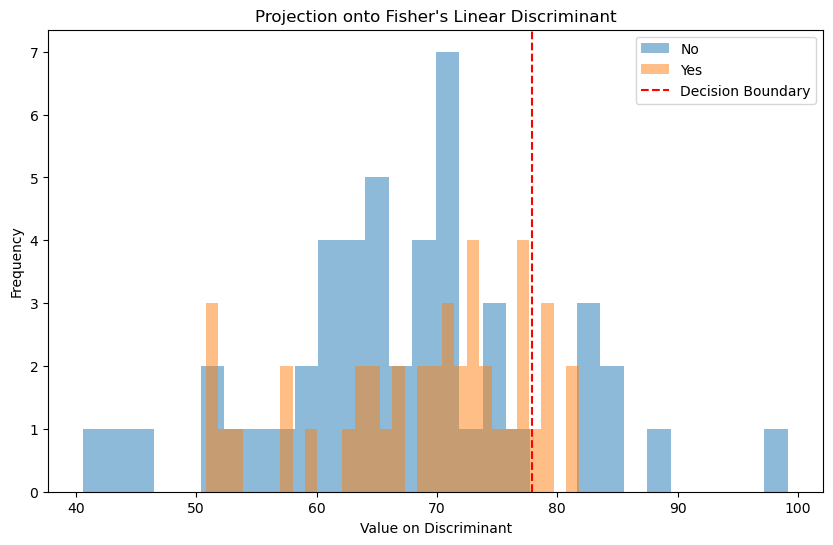

In [10]:
# Compute the Fisher's linear discriminant (This is essentially the weights of the LDA model)
fishers_ld = lda_model.coef_[0]

# Normalize the Fisher's Linear Discriminant
fishers_ld /= np.linalg.norm(fishers_ld)

# We need to project our test data onto the discriminant to plot them
lda_projection = np.dot(X_test, fishers_ld)

# We can create a simple function to separate the projections based on their class labels
def project_by_class(projections, labels, class_label):
    return projections[labels == class_label]

# Separate the projections
proj_class_0 = project_by_class(lda_projection, y_test, lda_model.classes_[0])
proj_class_1 = project_by_class(lda_projection, y_test, lda_model.classes_[1])

# Plot the projections
plt.figure(figsize=(10, 6))
plt.hist(proj_class_0, bins=30, alpha=0.5, label=str(lda_model.classes_[0]))
plt.hist(proj_class_1, bins=30, alpha=0.5, label=str(lda_model.classes_[1]))

# Add a line for the decision boundary
# This is where the discriminant function would be zero
boundary = -lda_model.intercept_[0] / fishers_ld
plt.axvline(boundary[0], color='red', linestyle='--', label='Decision Boundary')

# Add some labels and a legend
plt.xlabel('Value on Discriminant')
plt.ylabel('Frequency')
plt.title('Projection onto Fisher\'s Linear Discriminant')
plt.legend()

# Show the plot
plt.show()

## Naive Bayes

$$
Pr(Y=k|X=x) = \frac{\pi_k f_k(x))}{\sum_{l=1}^{K}\pi_l f_l(x)}
$$

1. With $f_k(x) = \prod_{j=1}^p f_{jk}(x|x_j)$ (conditional independence model) in each class, we get `naive Bayes`


## Type of Errors and ROC

![image.png](./img/27.png)

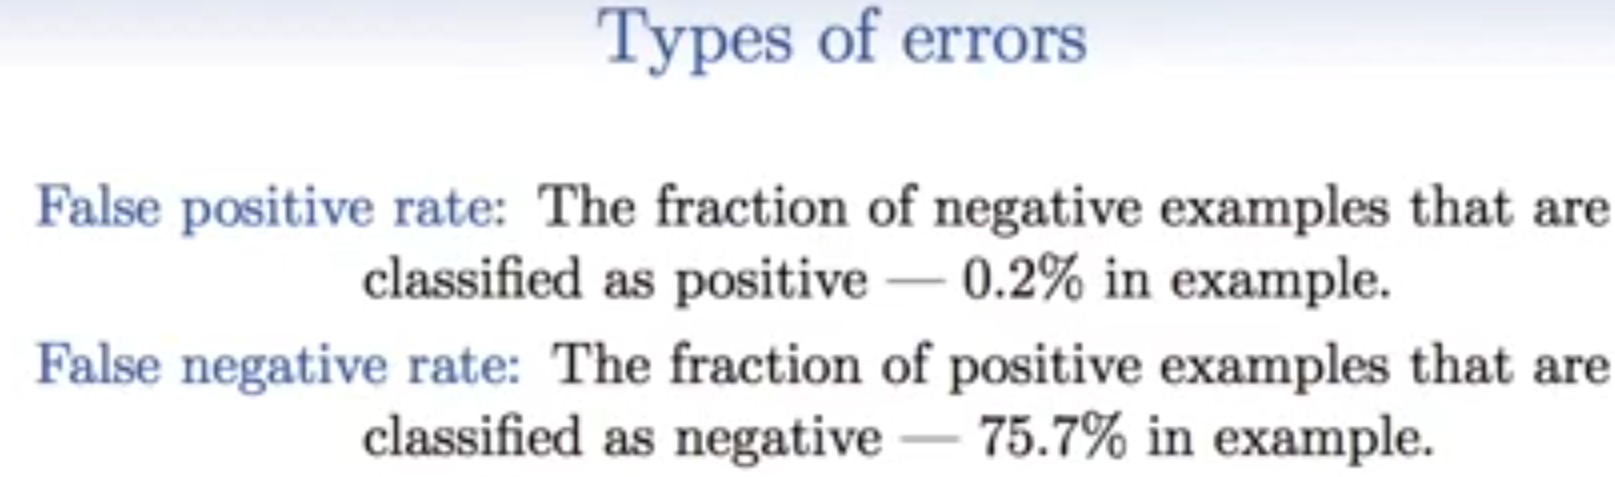

### ROC

- [Material](https://www.youtube.com/watch?v=4jRBRDbJemM&ab_channel=StatQuestwithJoshStarmer)

- **Definition**: `Receiver Operating Characteristic (ROC)` curve and Area Under the `Receiver Operating Characteristic Curve (AUC) `is a statistical metric used to evaluate the performance of **binary classifiers** at various threshold settings.

1. `AUC` values ranging from 0.5 to 1, higher value means better performance
2. For **"positive-matters" cases, we can lower the threshold** to get more "false positive" case but identify more positive cases. \* Infected with Ebola
   $$
   y_{axis} = True Positive Rate = Sensitivity = \frac{True Positives}{True Positives+False Negatives}
   $$
   $$
   x_{axis} = False Positive Rate = 1 - Specificity = \frac{False Positives}{False Positives+True Negatives}
   $$
3. f there were **lots of negative instance**, use `Precision` might be more useful than False Positive Rate
   - `Precision` does not include the number of `True Negatives` in its calculation, and is **not effected by the imbalance**.

$$
Precision = \frac{True Positives}{True Positives+False Positives }
$$

![image.png](./img/28.png)


## Generalized Linear Models

- `Logistic regression` is the counterpart for `binary response`, but there're other response types exist, such as `non-negative` responses, `skewed distributions`, and more.
- `Generalized linear models` provide a unified framework for dealing with these response types

### Examples

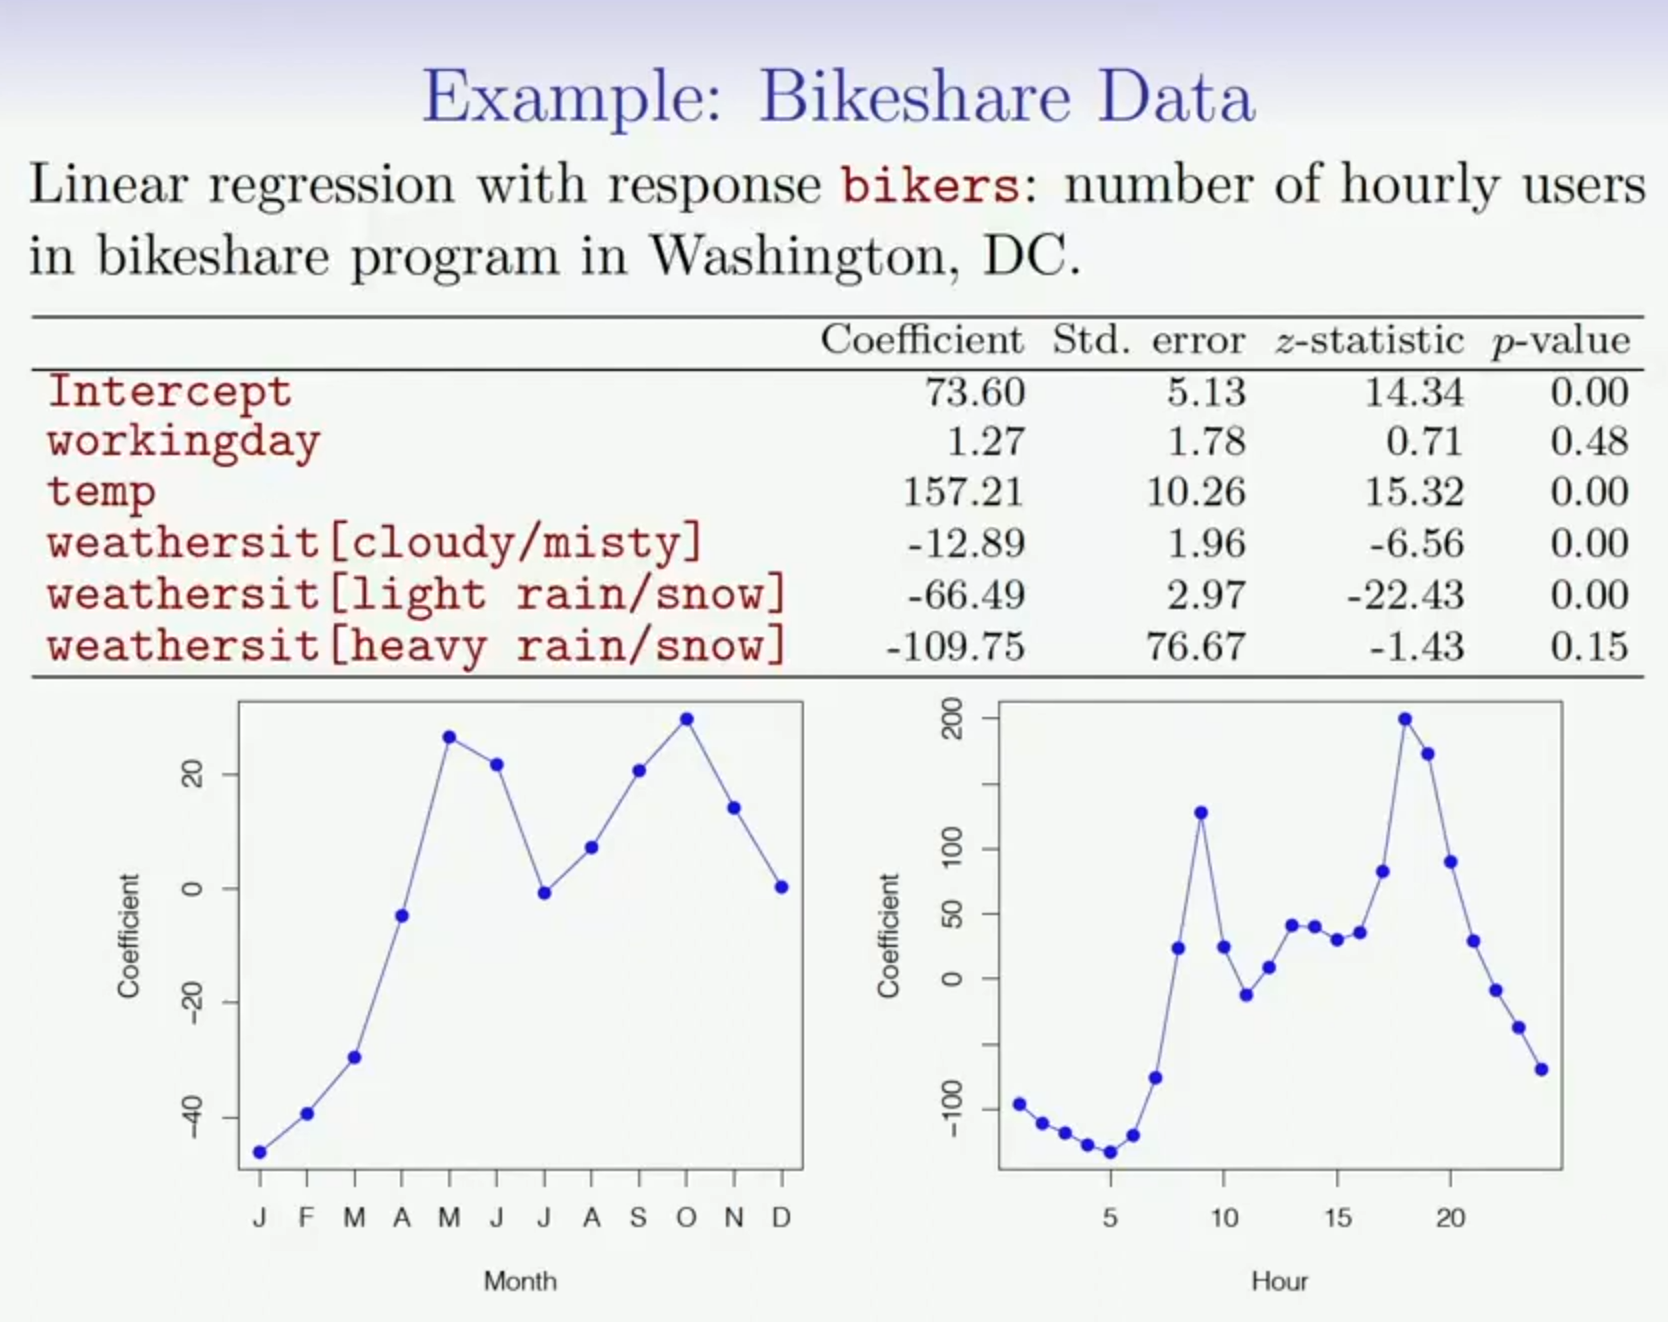
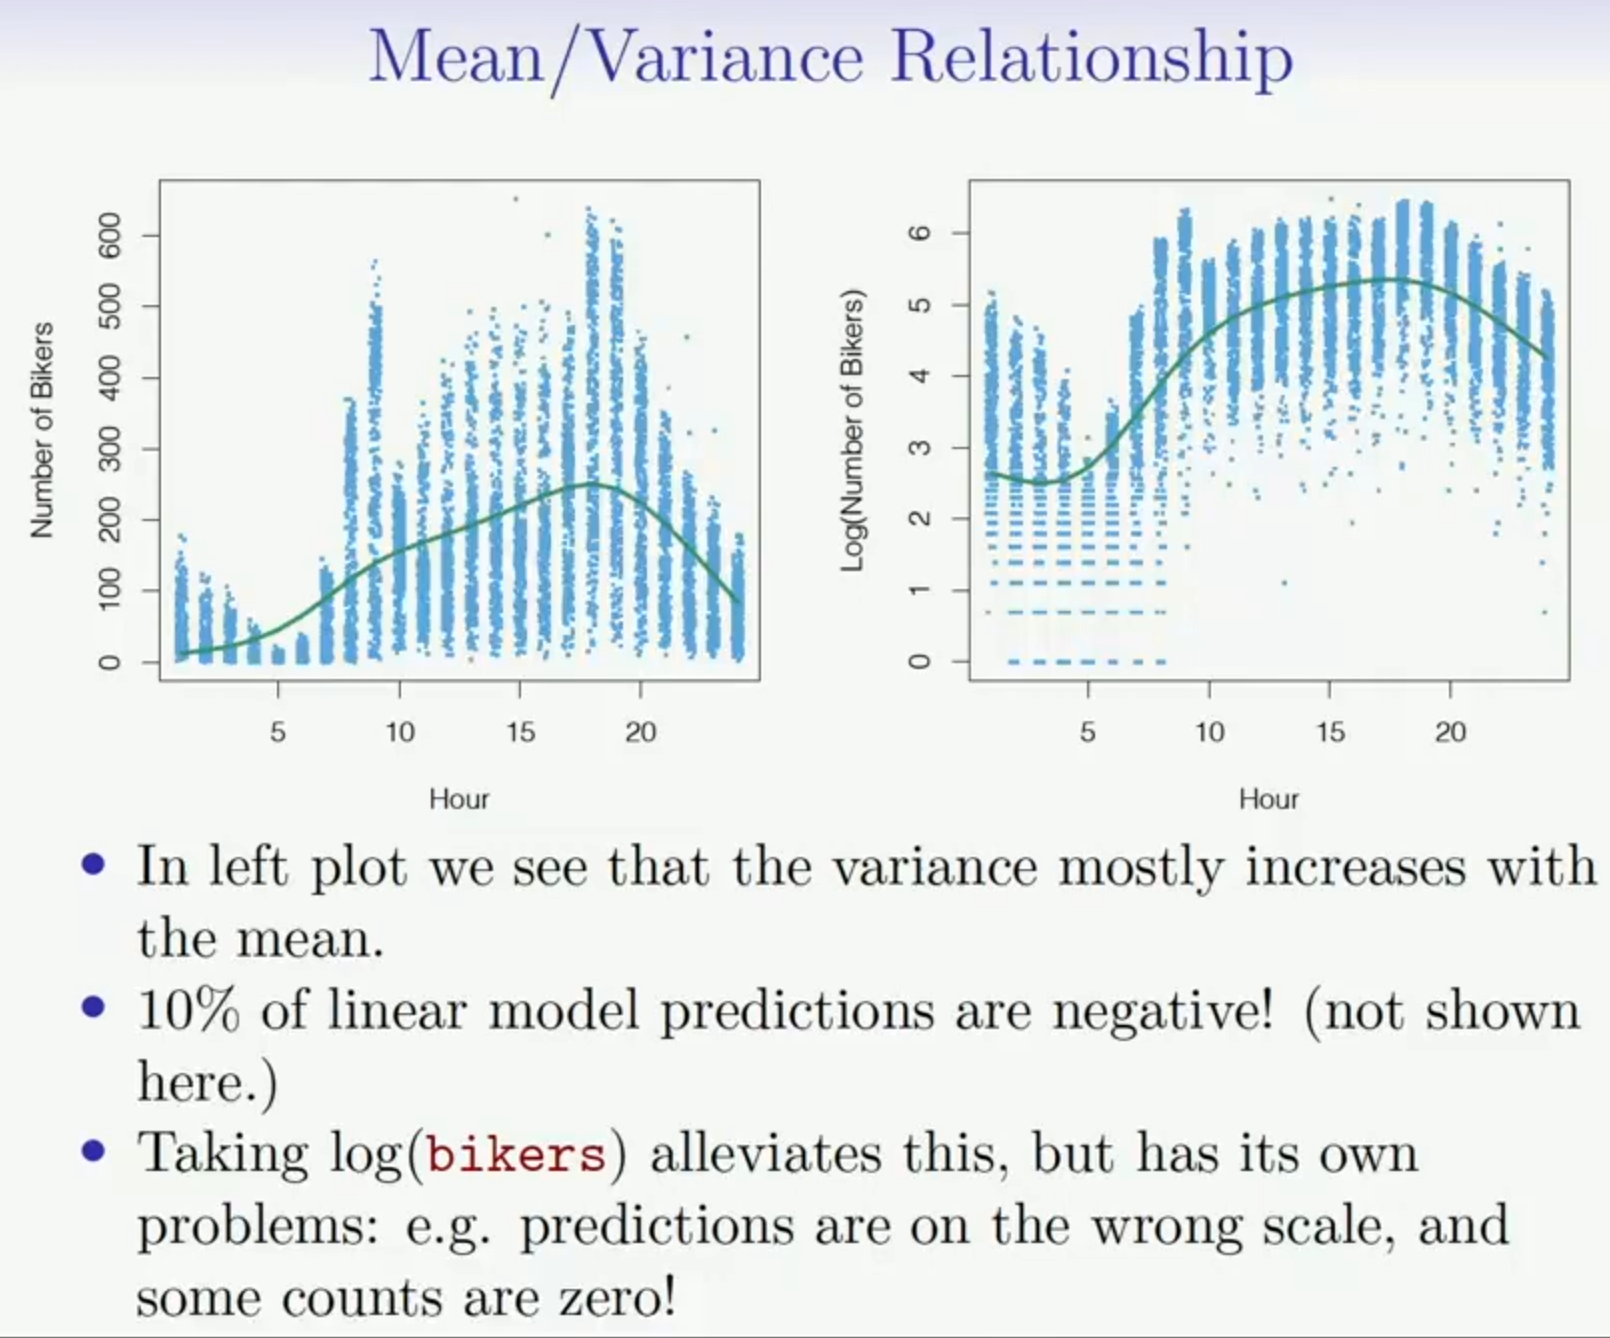


### Poisson Regression Model

- Poisson distribution is useful for modeling counts \* for $k = 0,1,2,... $ and $\lambda = E(Y)=Var(Y)$
  $$
  Pr(Y=k) = \frac{e^{-\lambda}\lambda ^k}{k!}
  $$

1. With covariates, we model
   $$
   log(\lambda(X_1,...,X_p)) = \beta_0 + \beta_1 X_1 + ... + \beta_p X_p
   $$
   or equivalently
   $$
   \lambda(X_1,...,X_p) = e^{\beta_0 + \beta_1 X_1 + ... + \beta_p X_p}
   $$
   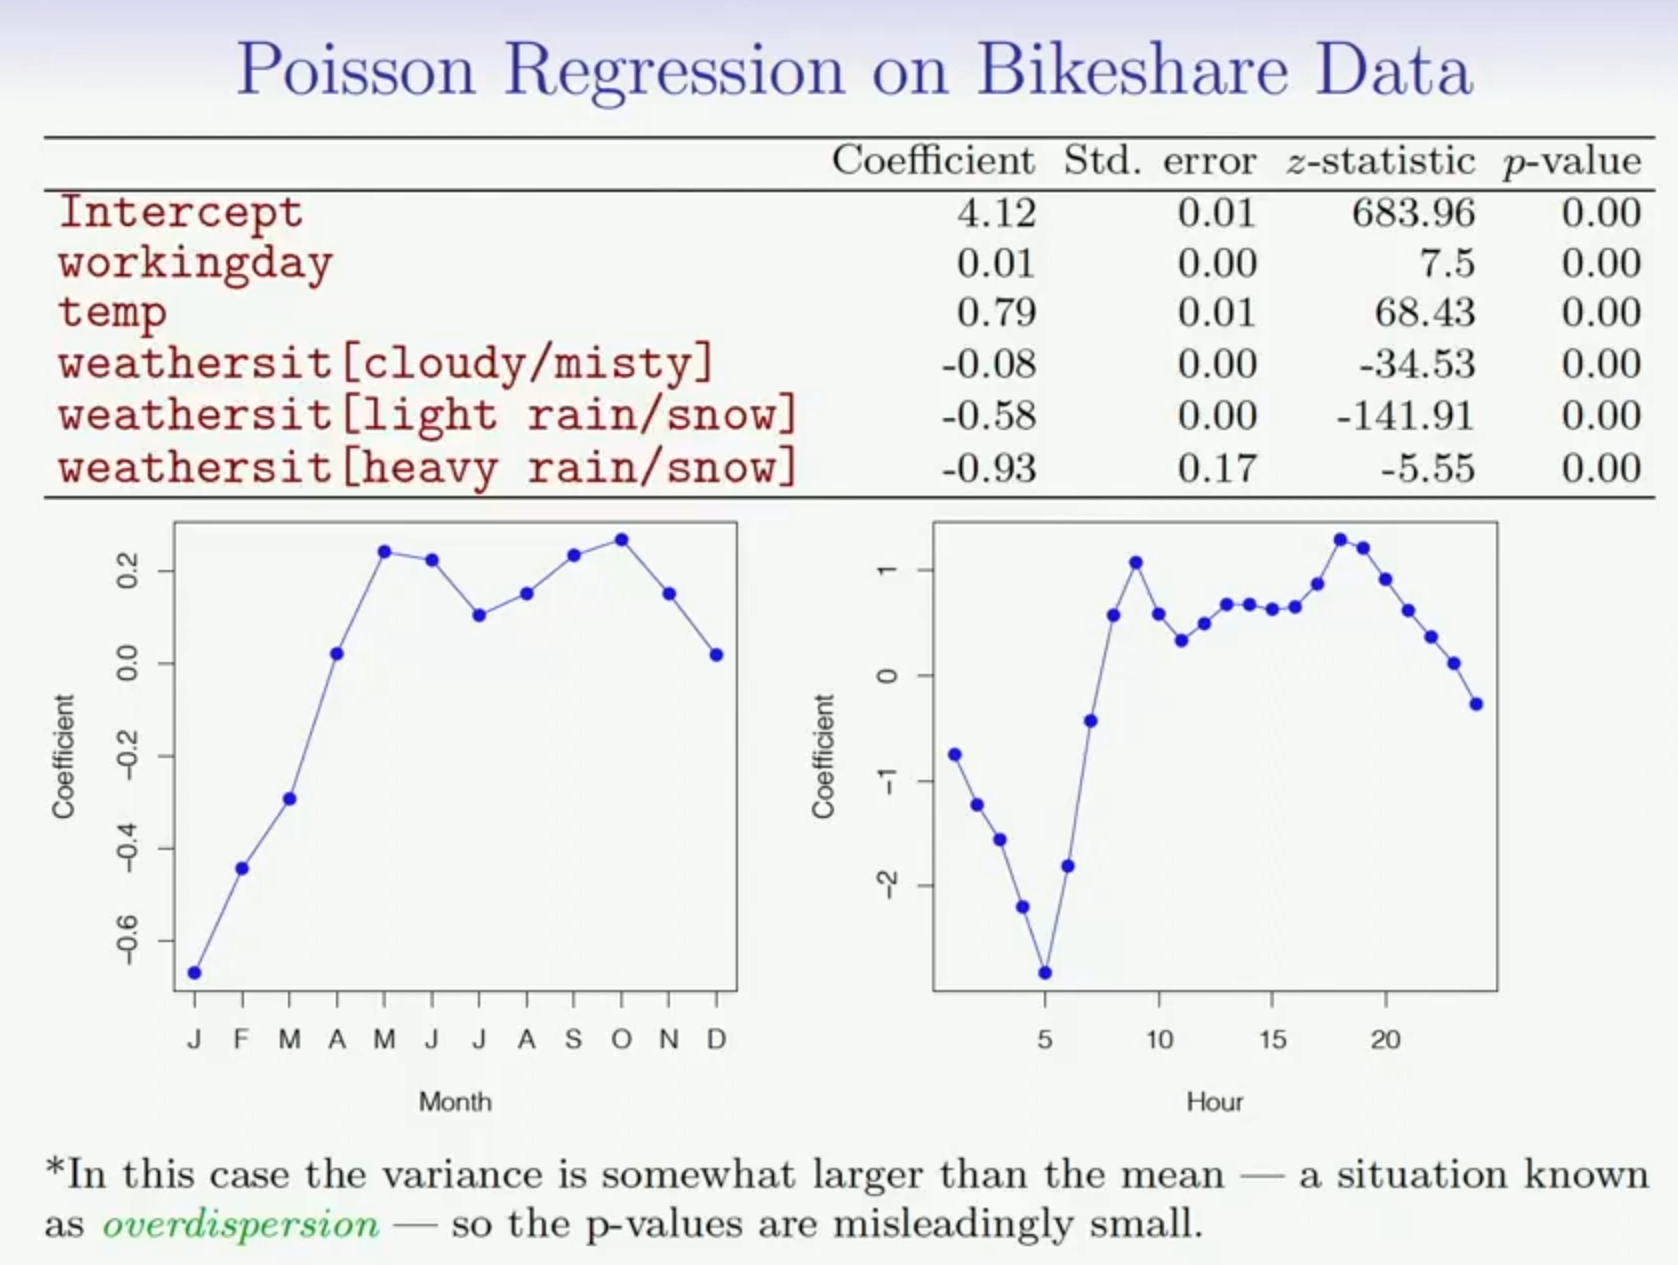


## Summary of GLM

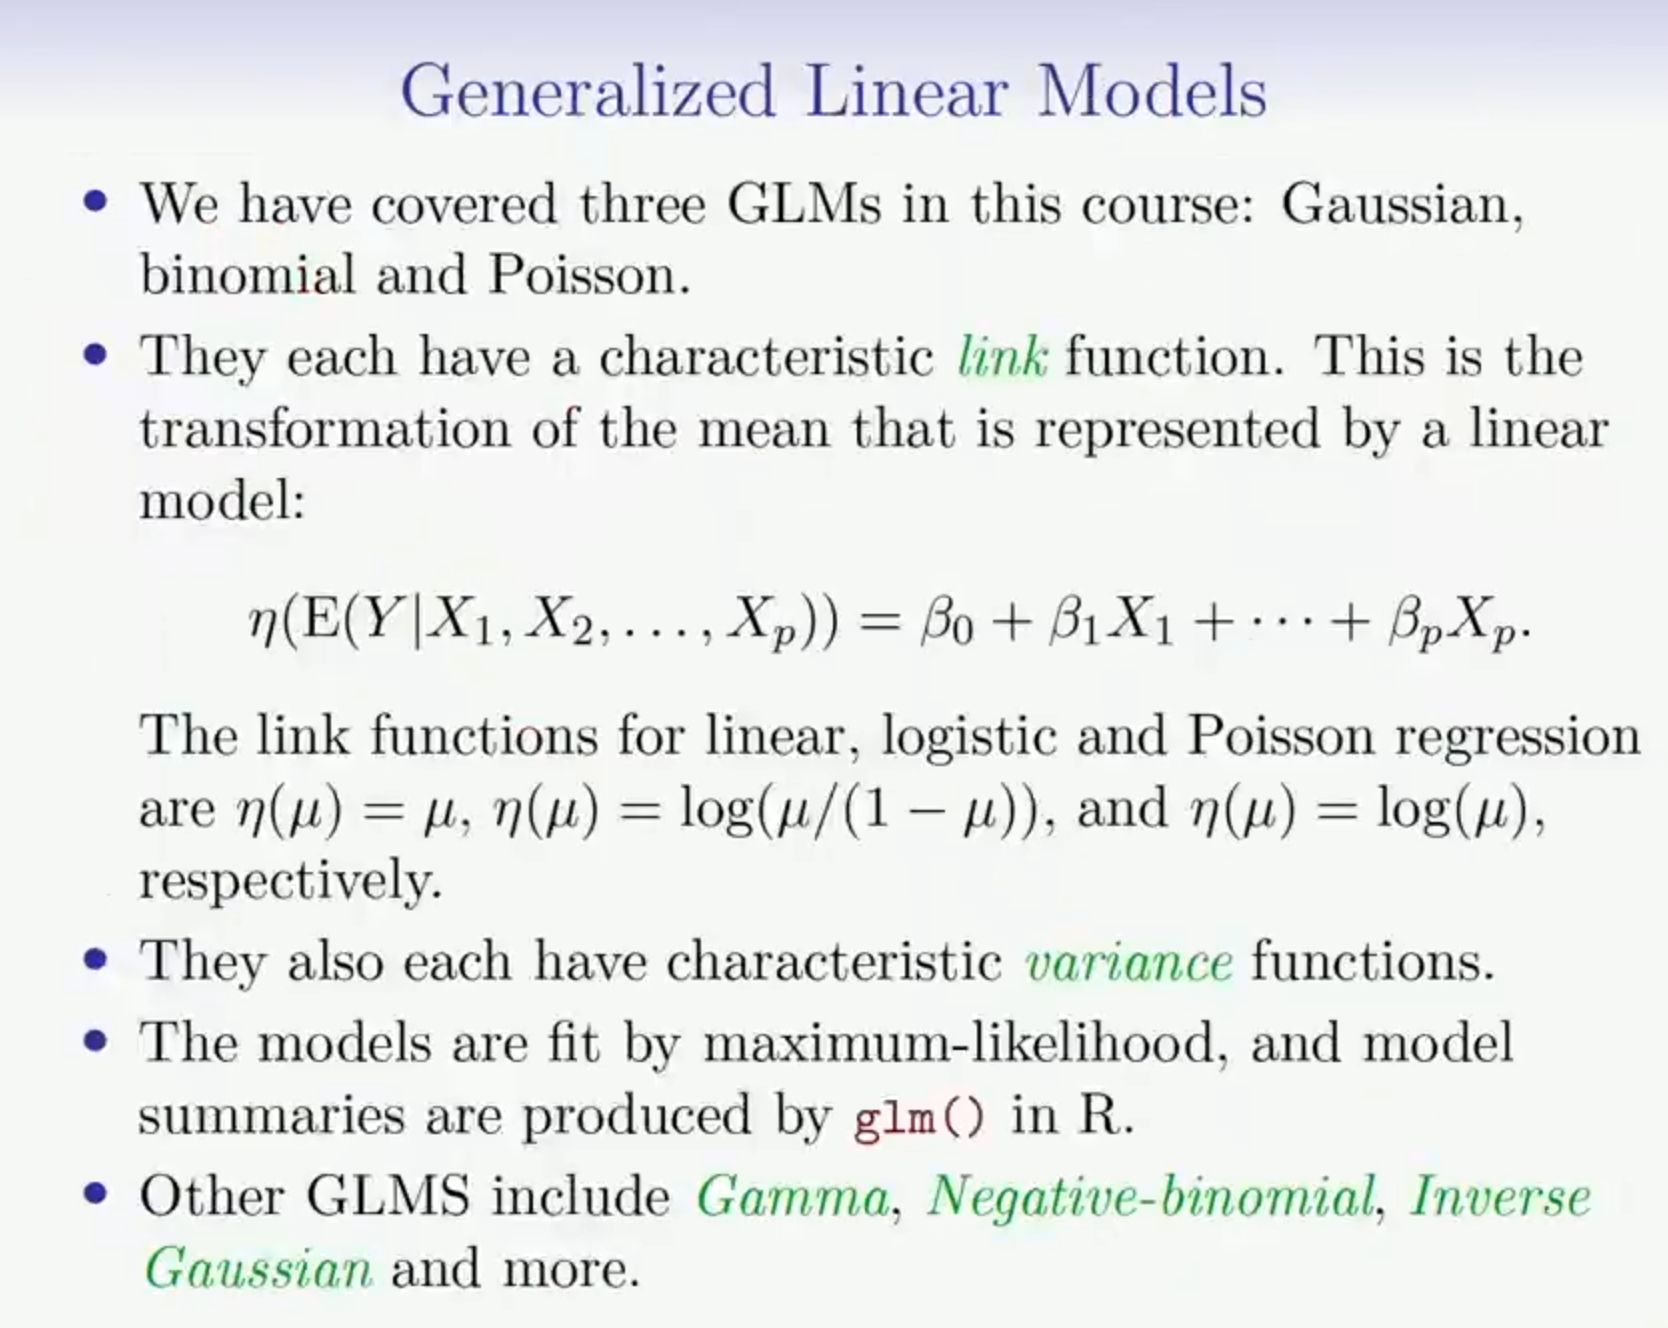
